In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./data/adult.data')
features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
labels = 'label_code'
# 将文字变量转化为数字变量
data[labels] = pd.Categorical(data.label).codes
data[['label', labels]]

,label,label_code
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0
...,...,...
32556,<=50K,0
32557,>50K,1
32558,<=50K,0
32559,<=50K,0


In [3]:
# 将数据分为训练集和测试集
train_set, test_set = train_test_split(data, test_size=0.2, random_state=2310)
# 训练模型并分析模型效果
model = LogisticRegression()
model.fit(train_set[features], train_set[labels])

LogisticRegression()

In [4]:
# 得到预测的概率
preds = model.predict_proba(test_set[features])[:, 1]
# 得到False Positive Rate和True Positive Rate
fpr, tpr, _ = metrics.roc_curve(test_set[labels], preds)
# 得到AUC
auc = metrics.auc(fpr, tpr)
auc

0.8309502395153554

In [5]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99716427, 0.99777193,
       1.        ])

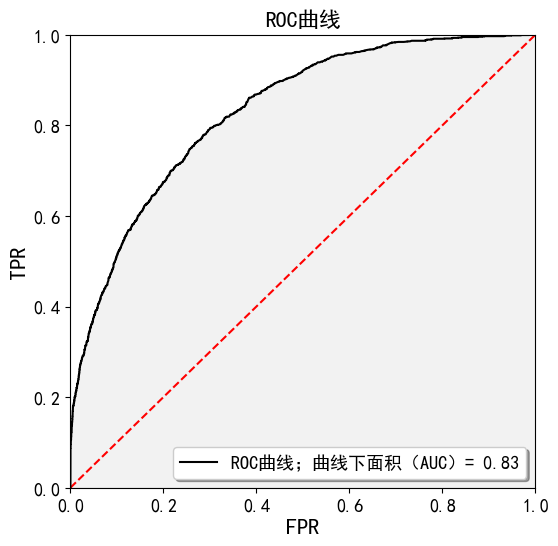

In [6]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams["font.sans-serif"] = ["SimHei"]
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=100)
# 在图形框里只画一幅图
ax = fig.add_subplot(1, 1, 1)
ax.set_title('ROC曲线')
ax.set_xlabel("FPR", fontsize=16)
ax.set_ylabel("TPR", fontsize=16)
ax.plot([0, 1], [0, 1], "r--")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.plot(fpr, tpr, 'k', label=f'ROC曲线；曲线下面积（AUC）= {auc:0.2f}')
ax.fill_between(fpr, tpr, color="grey", alpha=0.1)
legend = plt.legend(shadow=True)
plt.savefig('roc_curve.png', dpi=200)
plt.show()

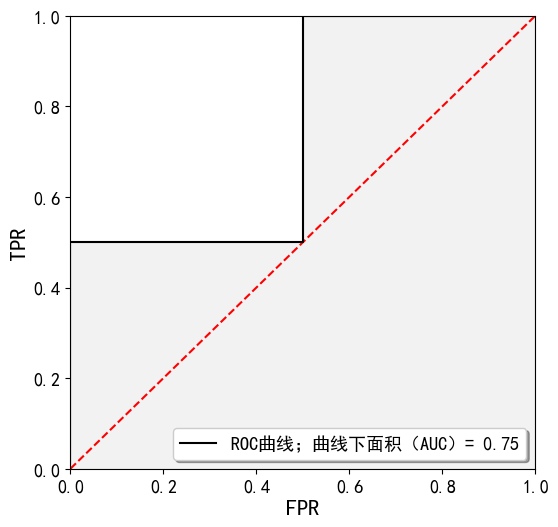

In [7]:
# 理解AUC的简单例子
fpr = [0, 0, 0.5, 0.5, 1]
tpr = [0, 0.5, 0.5, 1, 1]
auc = metrics.auc(fpr, tpr)
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams["font.sans-serif"] = ["SimHei"]
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框
fig = plt.figure(figsize=(6, 6), dpi=100)
# 在图形框里只画一幅图
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("FPR", fontsize=16)
ax.set_ylabel("TPR", fontsize=16)
ax.plot([0, 1], [0, 1], "r--")
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.plot(fpr, tpr, 'k', label=f'ROC曲线；曲线下面积（AUC）= {auc:0.2f}')
ax.fill_between(fpr, tpr, color="grey", alpha=0.1)
legend = plt.legend(shadow=True)
plt.savefig('roc_curve_example.png', dpi=200)
plt.show()